# Stream 3 Assignment

**Please update your name below and run the cell to verify your submission**

In [6]:
#!pip install geopandas


In [25]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [13]:
import datetime
import socket

# Get local time
local_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Get computer ID or hostname
computer_id = socket.gethostname()

# Print output with local time and computer ID
print('Assignment: Solutions by Olayinka Mogaji') # Please change your name here
print('Local Time:', local_time)
print('Computer ID:', computer_id)

Assignment: Solutions by Olayinka Mogaji
Local Time: 2024-10-07 13:54:42
Computer ID: DESKTOP-FQCA9OR


# Tasks
1. Create a geographic data visualization that shows the average wheat production by country for the years 2020 to 2022 (30% of assignment grade)
   
2. Create a geographic data visualization that shows world population by country (30% of assignment grade)
   
3. Create a geographic data visualization that shows 2022 wheat production per 1 million people by country (40% of assignment grade)

# Datasets

A) List of countries by wheat production https://en.wikipedia.org/wiki/List_of_countries_by_wheat_production
  
B) List of countries and dependencies by population https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population
  
C) World Countries Generalized (general boundaries for countries of the world) https://hub.arcgis.com/datasets/esri::world-countries-generalized/explore


# Hints and Tips

- Datasets A and B have tables that can be read directly into a pandas dataframe using the following command: `pd.read_html(url)[0]`.

- Dataset C contains the geometry coordinates for geopandas plots. Download the file as a geojson and read it using the following command `gpd.read_file(geojson_file_path).rename(columns={'COUNTRY': 'Country'})`.

- Merge dataframes based on the country name. Ensure that the countries have the same name and can be merged together. You can use the following command: `pd.merge(df1, df2, on='Country', how='inner')`.

- Feel free to DM me (Alex D'Ippolito) on Slack if you have questions.

# Assignment Submission

- Create your own repository on github with your completed assignment and DM me the link

- Assignment is due by end of day on October 7, 2024

## Data reading

In [14]:
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_wheat_production'

df=pd.read_html(url)[0]

df.head(10)

,Country,2022[1],2021[1],2020[1],2019[1],2018[1],2017[1],2016[1],2015[1],2014[1],...,2005[1],2004[1],2003[1],2002[1],2001[1],2000[1],1999[1],1998[1],1997[1],1996[1]
0,World total,808.4,772.8,757.0,764.1,732.4,772.9,748.4,741.8,728.8,...,627.0,634.7,550.0,592.0,588.2,587.6,581.5,593.3,619.1,571.4
1,China,137.7,136.9,134.3,133.6,131.4,134.2,133.3,132.6,126.2,...,97.4,92.0,86.5,90.3,93.9,99.6,113.9,109.7,123.3,110.6
2,India,107.7,109.6,107.9,103.6,99.9,98.5,92.3,86.5,95.9,...,68.6,72.2,65.8,72.8,69.7,76.4,71.3,66.3,69.4,62.1
3,Russia,104.2,76.1,85.9,74.5,72.1,86.0,73.3,61.8,59.7,...,47.6,45.4,34.1,50.6,47.0,34.5,31.0,27.0,44.2,34.8
4,United States,44.9,44.8,49.8,52.6,51.3,47.4,62.8,55.8,55.1,...,57.2,58.7,63.8,43.7,53.0,60.6,62.6,69.3,67.5,62.0
5,Australia,36.2,31.9,14.5,17.6,20.9,31.8,22.3,23.7,25.3,...,21.9,26.1,10.1,24.3,22.1,24.8,21.5,19.2,23.7,16.5
6,France,34.6,36.6,30.2,40.6,35.4,38.7,29.3,42.8,39.0,...,36.9,39.7,30.5,38.9,31.5,37.4,37.0,39.8,33.9,35.9
7,Canada,34.3,22.4,35.4,32.7,32.4,30.4,32.1,27.6,29.4,...,25.7,24.8,23.0,16.0,20.6,26.5,27.0,24.1,24.3,29.8
8,Pakistan,26.2,27.5,25.2,24.3,25.1,26.7,25.6,25.1,26.0,...,21.6,19.5,19.2,18.2,19.0,21.1,17.9,18.7,16.7,16.9
9,Germany,22.6,21.5,22.2,23.1,20.3,24.5,24.5,26.5,27.8,...,23.7,25.4,19.3,20.8,22.8,21.6,19.6,20.2,19.8,18.9


In [15]:
url2 = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
df2= pd.read_html(url2)[0]
df2.head(10)  

,Unnamed: 0,Location,Population,% ofworld,Date,Source (official or fromthe United Nations),Notes
0,NaN,World,8119000000,100%,1 Jul 2024,UN projection[1][3],NaN
1,[b],China,1409670000,NaN,31 Dec 2023,Official estimate[5],[c]
2,[b],India,1404910000,NaN,1 Jul 2024,Official projection[6],[d]
3,3,United States,335893238,NaN,1 Jan 2024,Official projection[7],[e]
4,4,Indonesia,281603800,NaN,1 Jul 2024,National annual projection[8],NaN
5,5,Pakistan,241499431,NaN,1 Mar 2023,2023 census result[9],[f]
6,6,Nigeria,223800000,NaN,1 Jul 2023,Official projection[10],NaN
7,7,Brazil,203080756,NaN,1 Aug 2022,2022 census result[11],NaN
8,8,Bangladesh,169828911,NaN,14 Jun 2022,2022 census result[12],NaN
9,9,Russia,146150789,NaN,1 Jan 2024,Official estimate[13],[g]


In [29]:
geo_df = gpd.read_file("C:/Users/olayi/Documents/PALETTE TRAINING/Stream 3/World_Countries_(Generalized)_9029012925078512962.geojson")
geo_df 

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,geometry
0,1,Afghanistan,AF,Afghanistan,AF,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,2,Albania,AL,Albania,AL,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,3,Algeria,DZ,Algeria,DZ,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,4,American Samoa,AS,United States,US,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
4,5,Andorra,AD,Andorra,AD,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."
...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ..."
247,248,Wallis and Futuna,WF,France,FR,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137..."
248,249,Yemen,YE,Yemen,YE,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13..."
249,250,Zambia,ZM,Zambia,ZM,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096..."


**Task 1: Geographic Visualization of Average Wheat Production by Country (2020–2022)**

In [16]:
# Load wheat production data from Wikipedia
url_wheat = 'https://en.wikipedia.org/wiki/List_of_countries_by_wheat_production'
df_wheat = pd.read_html(url_wheat)[0]

In [19]:
# Clean up the column headers and keep only relevant columns
# Remove any content inside square brackets (e.g., citations) from column headers and strip extra spaces with regular expression
df_wheat.columns = df_wheat.columns.str.replace(r'\[.*\]', '', regex=True).str.strip()
df_wheat = df_wheat[['Country', '2020', '2021', '2022']].dropna()     # drop NaN 

# Convert the '2020' column to numeric values, setting non-numeric entries to NaN by applying "coerce"
df_wheat['2020'] = pd.to_numeric(df_wheat['2020'], errors='coerce')
df_wheat['2021'] = pd.to_numeric(df_wheat['2021'], errors='coerce')
df_wheat['2022'] = pd.to_numeric(df_wheat['2022'], errors='coerce')

# Calculate average wheat production from 2020 to 2022, rounding to 2 decimal places
df_wheat['Avg_Wheat_Production'] = df_wheat[['2020', '2021', '2022']].mean(axis=1).round(2)

# Print the country and average wheat production
display(df_wheat[['Country', 'Avg_Wheat_Production']])

,Country,Avg_Wheat_Production
0,World total,779.40
1,China,136.30
2,India,108.40
3,Russia,88.73
4,United States,46.50
5,Australia,27.53
6,France,33.80
7,Canada,30.70
8,Pakistan,26.30
9,Germany,22.10


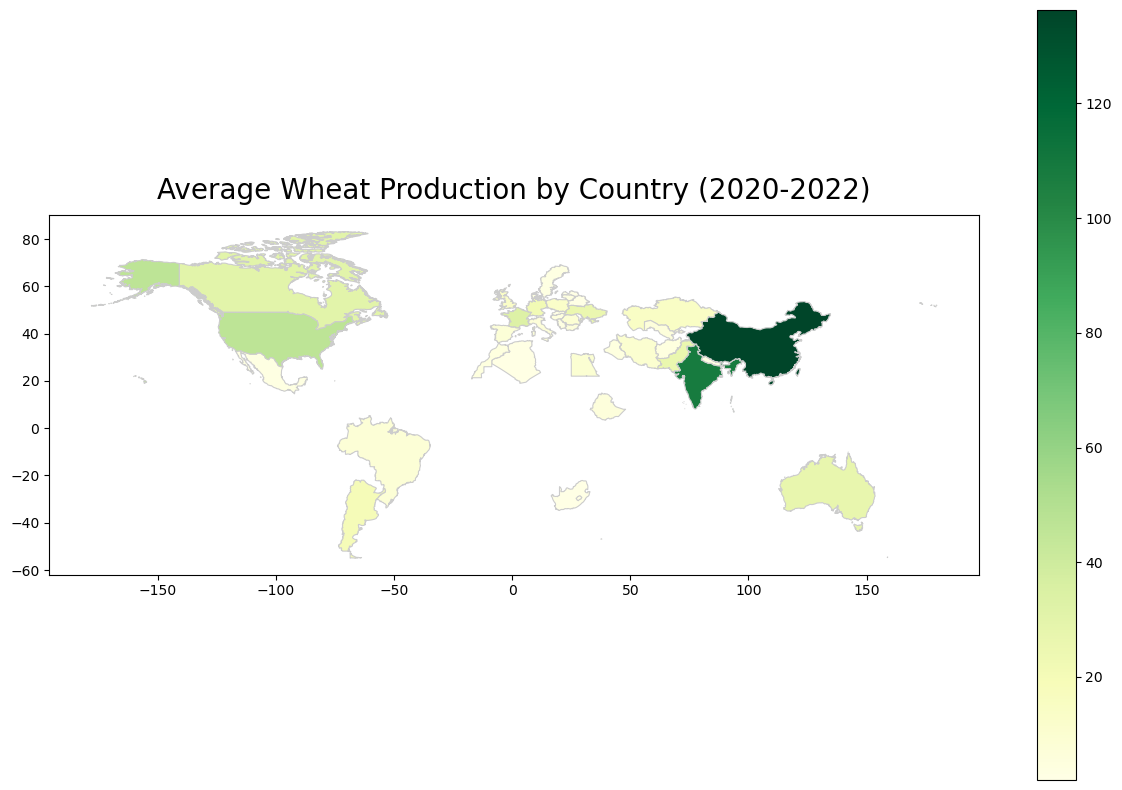

In [53]:
# Plot average wheat production by country (2020-2022)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_wheat_df.plot(column='Avg_Wheat_Production', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Average Wheat Production by Country (2020-2022)', fontdict={'fontsize': 20}, pad=12)
plt.show()

**Task 2: Geographic Visualization of World Population by Country**

In [54]:
# Load population data from Wikipedia
url_pop = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
df_pop = pd.read_html(url_pop)[0]
df_pop.head()

,Unnamed: 0,Location,Population,% ofworld,Date,Source (official or fromthe United Nations),Notes
0,NaN,World,8119000000,100%,1 Jul 2024,UN projection[1][3],NaN
1,[b],China,1409670000,NaN,31 Dec 2023,Official estimate[5],[c]
2,[b],India,1404910000,NaN,1 Jul 2024,Official projection[6],[d]
3,3,United States,335893238,NaN,1 Jan 2024,Official projection[7],[e]
4,4,Indonesia,281603800,NaN,1 Jul 2024,National annual projection[8],NaN


In [55]:
# Display the first few rows and the columns to check the DataFrame structure
print(df_pop.columns)

Index(['Unnamed: 0', 'Location', 'Population', '% ofworld', 'Date',
       'Source (official or fromthe United Nations)', 'Notes'],
      dtype='object')


In [56]:
# Select and rename relevant columns
df_pop = df_pop[['Location', 'Population']].dropna()  # Selecting Location and Population columns
df_pop.columns = ['Country', 'Population']  # Renaming for easier reference

# Convert Population to numeric by cleaning commas
df_pop['Population'] = df_pop['Population'].astype(str).str.replace(',', '').astype(float)

# Load geographic data (adjust this path to your actual file location)
geo_df = gpd.read_file("C:/Users/olayi/Documents/PALETTE TRAINING/Stream 3/World_Countries_(Generalized)_9029012925078512962.geojson")

# Rename the 'COUNTRY' column to 'Country' for easier merging
geo_df = geo_df.rename(columns={'COUNTRY': 'Country'})

# Merge population data with geographic data
merged_pop_df = geo_df.merge(df_pop[['Country', 'Population']], on='Country', how='inner')

# Drop rows with missing population data
merged_pop_df = merged_pop_df.dropna(subset=['Population'])

# Print the country and population data
display(merged_pop_df[['Country', 'Population']])

,Country,Population
0,Afghanistan,34262840.0
1,Albania,2402113.0
2,Algeria,46700000.0
3,Andorra,86398.0
4,Angola,35121734.0
...,...,...
181,Venezuela,28405543.0
182,Vietnam,100300000.0
183,Yemen,31888698.0
184,Zambia,19610769.0


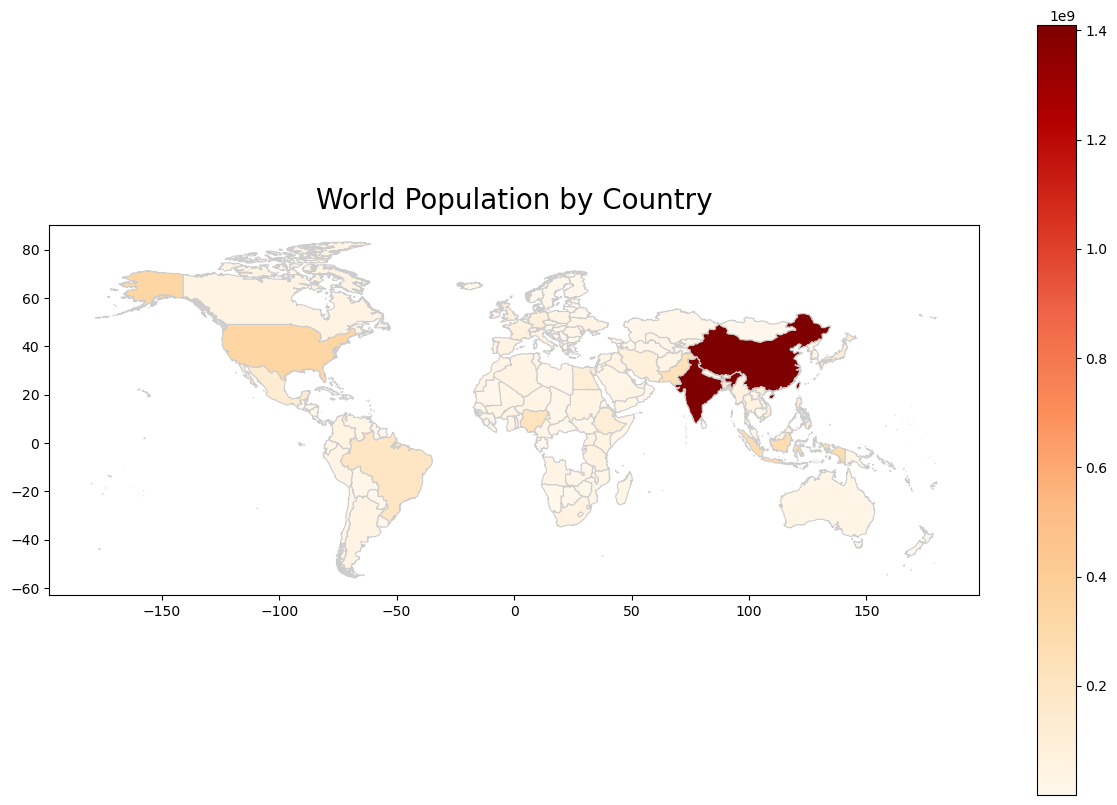

In [57]:
# Plot world population by country
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_pop_df.plot(column='Population', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('World Population by Country', fontdict={'fontsize': 20}, pad=12)
plt.show()

**Task 3: Geographic Visualization of 2022 Wheat Production per 1 Million People by Country**

In [59]:
# Calculate wheat production per 1 million people for 2022
merged_prod_pop_df['Wheat_per_Million'] = (merged_prod_pop_df['2022'] / merged_prod_pop_df['Population']) * 1e6

# Merge wheat per capita data with geographic data
merged_wheat_per_capita_df = geo_df.merge(merged_prod_pop_df[['Country', 'Wheat_per_Million']], on='Country', how='inner')

display(merged_prod_pop_df[['Country', 'Wheat_per_Million']].dropna())


,Country,Wheat_per_Million
0,China,0.097682
1,India,0.076660
2,Russia,0.712962
3,United States,0.133673
4,Australia,1.334690
5,France,0.505014
6,Canada,0.830738
7,Pakistan,0.108489
8,Germany,0.266799
9,Argentina,0.471664


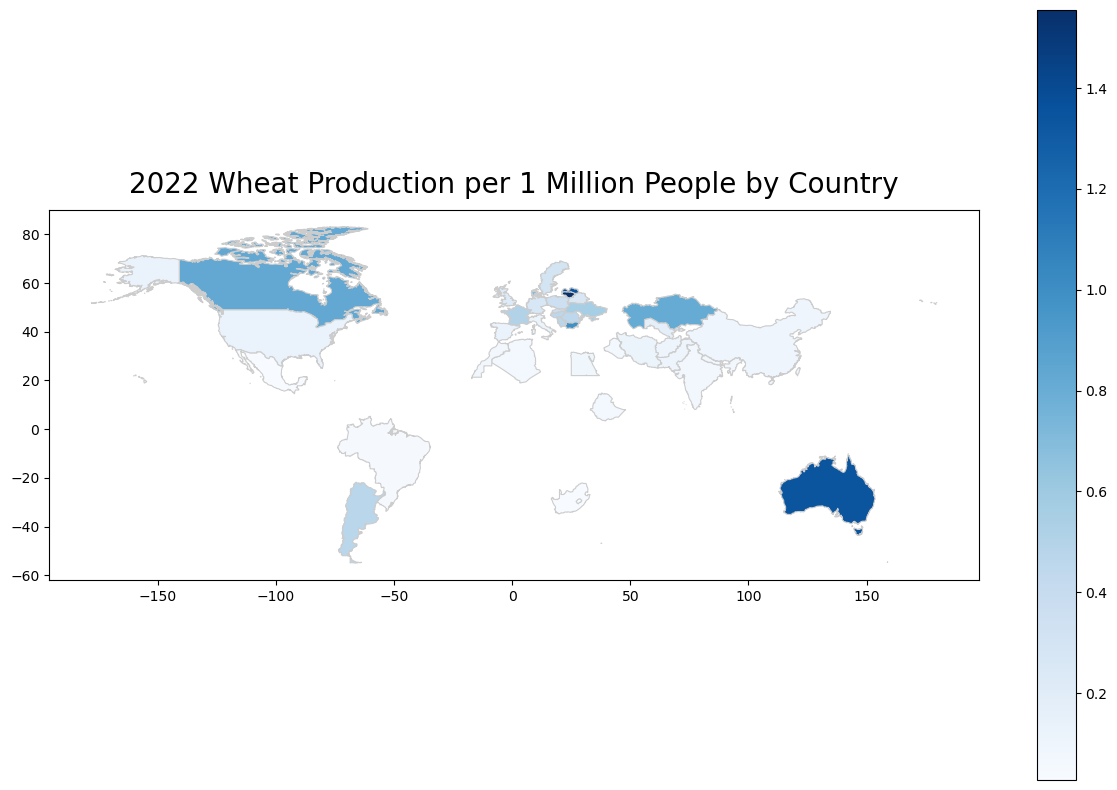

In [60]:
# Plot 2022 wheat production per 1 million people by country
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_wheat_per_capita_df.plot(column='Wheat_per_Million', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('2022 Wheat Production per 1 Million People by Country', fontdict={'fontsize': 20}, pad=12)
plt.show()
